In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


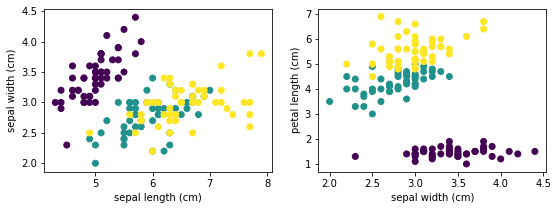

In [3]:
# load iris dataset 3 classes, 4 features,50 samples 
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector', data.shape)
print('dimensione labels vector', labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()

<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### K-means - 1st use

In [4]:
from sklearn import datasets
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

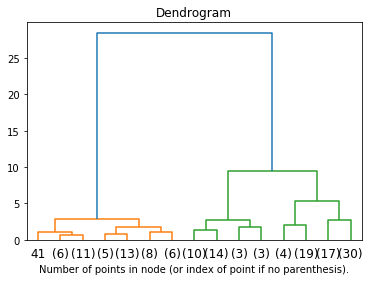

In [5]:
# iris dataset
X=data[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(agglCl.children_.shape[0])
    n_samples = len(agglCl.labels_)
    for i, merge in enumerate(agglCl.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglCl.children_, agglCl.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
agglCl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglCl = agglCl.fit(X)

# plot the top three levels of the dendrogram
plt.title('Dendrogram')
plot_dendrogram(agglCl, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### K-means - 2nd use

In [6]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

Number of clusters: 3
Homogeneity: 0.754
Completeness: 0.789
V-measure: 0.771
Adjusted Rand Index: 0.696
Adjusted Mutual Information: 0.768
Silhouette Coefficient: 0.606


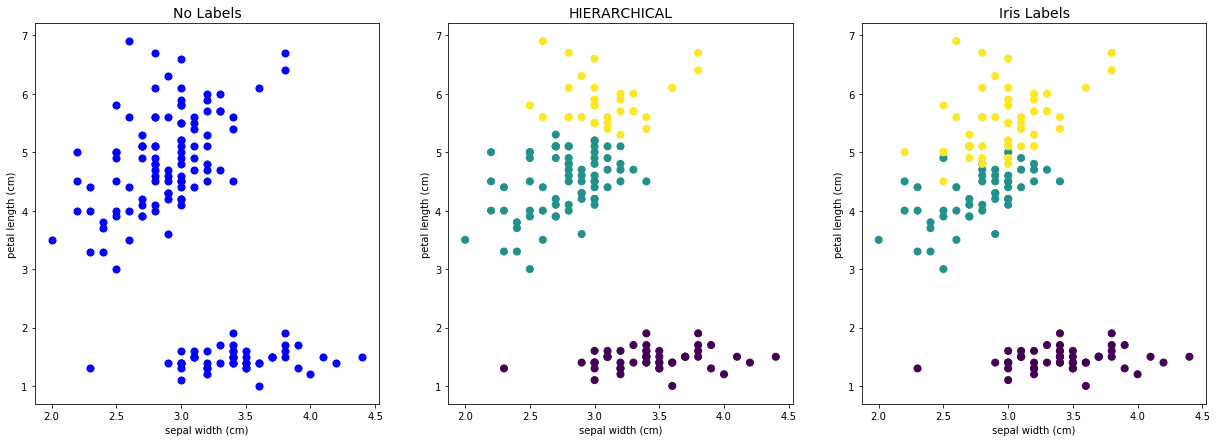

In [7]:
X=data[:,1:3]
axes_labes=iris.feature_names
axes_labes=axes_labes[1:3]

clusters=3

agglCl = AgglomerativeClustering(n_clusters=clusters,
                                 linkage="average", 
                                 affinity='euclidean')
'''
- affinity
Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. 
If linkage is “ward”, only “euclidean” is accepted.
- linkage
which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
The algorithm will merge the pairs of cluster that minimize this criterion. 
Ward minimizes the variance of the clusters being merged.
Average uses the average of the distances of each observation of the two sets.
Complete or maximum linkage uses the maximum distances between all observations of the two sets.
Single uses the minimum of the distances between all observations of the two sets.
'''

labels_=agglCl.fit_predict(X)

cluster_labels = ('b', labels_, iris.target)
title =('No Labels','HIERARCHICAL','Iris Labels',)
fig,ax = plt.subplots(1,len(cluster_labels), figsize=(21,7))

for i, label in enumerate(cluster_labels):
  ax[i].scatter(X[:, 0], X[:, 1], c=label, s=50)
  ax[i].set_xlabel(axes_labes[0])
  ax[i].set_ylabel(axes_labes[1])
  ax[i].set_title(title[i], fontsize=14)

print('Number of clusters: %d' % clusters)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, labels_))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, labels_))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, labels_))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_))